# Asg-4 focuses on 

## NFA2DFA (review) -- LT

## Reversal of NFA by hand -- XL

## Conversion to GNFA and Two Elimination Orders -- AR

## Chasing down the RE2NFA Components -- SV

## Here is the  plan

1. In LT, you will

    a. take a given nfa called nfa1
    
    b. convert it to dfa1 
    
    c. reverse nfa1 by hand obtaining rnfa1
    
    d. inspect and conclude (listing six paths) that rnfa1 is indeed a reverse of nfa1

2. In XL you will

    a. learn about a few DFA utilities such as totalize_dfa and dotObj_dfa_w_bh
    
    b. extract an RE by inspecting nfa1 and write it down as RE1_hand
    
    c. reverse RE1_hand by inspection, writing the result down as Rev_RE1_hand
    
    d. Understand the function del_gnfa_states via its help command
    

3. In AR you will

    a. obtain a GNFA for rnfa1, calling it grnfa1
    
    b. apply two elimination orders for states on grnfa1
    
    c. obtain Rev_RE1 and Rev_RE2
    
    d. check that Rev_RE1 and Rev_RE2 and Rev_RE1_hand are all isomorphic
    

4. In SV you will 

    a. print the NFA for Rev_RE2 and answer the stated questions.
    
    b. print the NFA for Rev_RE1_hand and answer the questions.

Please follow the instructions and submit your finished notebook as described in previous assignments.
 

# Asg-4 imports 


In [85]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_NFA    import *
from jove.Def_DFA    import *
from jove.Def_NFA2RE import *
from jove.Def_RE2NFA import *
from jove.AnimateNFA import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# 1. NFA to DFA by hand and Checking (LT) + Getting a simple RE

You are given this NFA below

## 1(a). nfa1 is given below

Questions follow under 1(b)

In [86]:
# Given NFA

nfa1 = md2mc('''NFA
I1 : '' -> B
I1 : a  -> I2

I2 : c  -> F3
I2 : b  -> B

B : s  -> B
B : d  -> F4
B : f  -> F3
''')


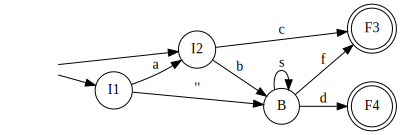

In [87]:
dotObj_nfa(nfa1)

## 1(b). Obtain the DFA of the above NFA by hand. I've given you a start.

1. Obtain the Eclosure of the initial NFA state. That is the DFA's initial state.

2. When we go from I1_I2_B (set of states corresponding to the Eclosure) and give that state 'a', it goes to "wasI2". This is no longer the initial state of the DFA, and hence called "wasI2".

3. Finish the remaining steps below.

Show your work by typing in the Eclosure details of each step wherever there is a $\varepsilon$ involved in a given DFA state

For DFA states where there is no $\varepsilon$ involved, just show the final Eclosed result.

Use as many bullets as necessary to clearly show your work:

* From I1_I2_B on a
  - 'b' go to B
  - 'c' or 'f' go to F3
  - 'd' go to F4
  - 's' go to B

* From wasI2 on a 
  - 'b' go to B
  - 'c' go to F3

* From B on a
  - 'd' go to F4
  - 'f' go to F3
  - 's' go to B

In [88]:
# DFA of nfa1

dfa1 = md2mc('''DFA

I1_I2_B : a -> wasI2
I1_I2_B : b -> B
I1_I2_B : c -> F3
I1_I2_B : d -> F4
I1_I2_B : f -> F3
I1_I2_B : s -> B

wasI2   : b -> B
wasI2   : c -> F3

B       : d -> F4
B       : f -> F3
B       : s -> B


''')

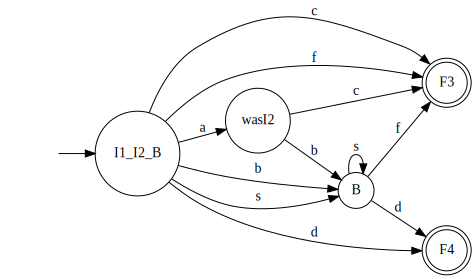

In [89]:
dotObj_dfa(dfa1)

## 1(c). Reverse nfa1 by hand, below. In doing so, it is helpful for me to suggest state renamings for you

1) Change F3 to I3

2) Change F4 to I4

3) Change I1 and I2 to F1 and F2

4) Now, reverse the transitions of nfa1, obtaining "rnfa1" below
 

In [90]:
# There is no Jove function to reverse automatically - do it by hand!

rnfa1 = md2mc('''
NFA

I3 : c -> F2
I3 : f -> B

I4 : d -> B

B: b -> F2
B: '' -> F1
B: s -> B

F2: a -> F1
''')

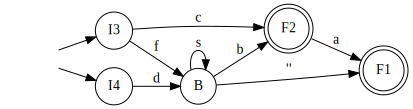

In [91]:
dotObj_nfa(rnfa1)

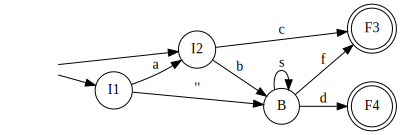

In [92]:
dotObj_nfa(nfa1)

## 1(d). Inspect and conclude that rnfa1 is truly the reverse of nfa1


### List the first six strings in numeric order and check that they have been correctly reversed. 

State the string in the original machine and explain (by specifying a path as a sequence of states) that this string is present in the reversed machine also.

1. "c": $I3 \xrightarrow{c} F2$

2. "d": $I4 \xrightarrow{d} B \xrightarrow{\epsilon} F1$

3. "f": $I3 \xrightarrow{f} B \xrightarrow{\epsilon} F1$

4. "ac": $I3 \xrightarrow{c} F2 \xrightarrow{a} F1$

5. "bd": $I4 \xrightarrow{d} B \xrightarrow{b} F2$

6. "bf": $I3 \xrightarrow{f} B \xrightarrow{b} F2$

 
 

# 2. Extraction of RE by Inspection (XL) and other things before it


## 2(a). You can totalize dfa1 to obtain the totalized machine

* Explain totalize_dfa in a few sentences below, by looking at the Delta before and After

In [93]:
tdfa1 = totalize_dfa(dfa1)

### Your explanation of totalize_dfa

* Add a black hole state ($BH$)

* $\forall s \in \Sigma, \forall q \in Q$ if $\delta$ does not have a mapping for $(q,s)$ then make $\delta(q,s) = BH$



##  A printout may look the same ... till you print w_bh 

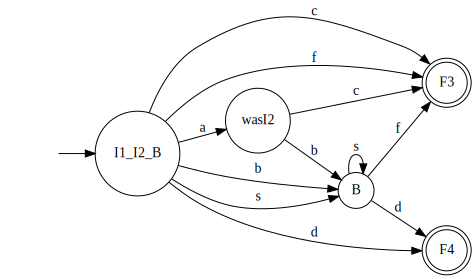

In [94]:
dotObj_dfa(tdfa1)

##  Let us print with blackhole

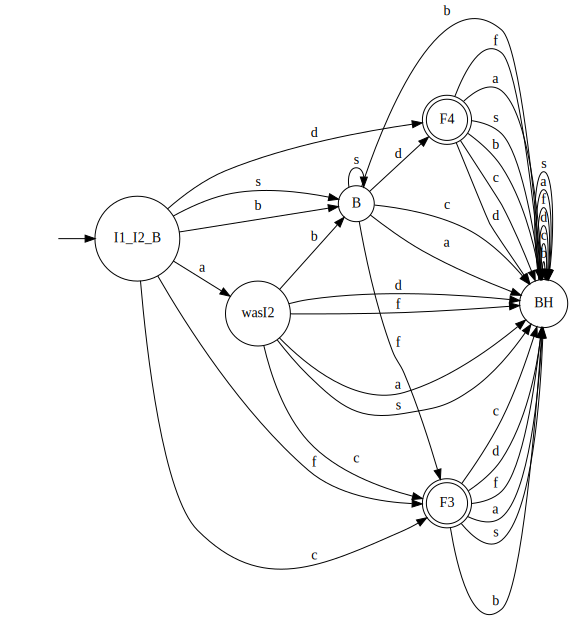

In [95]:
dotObj_dfa_w_bh(tdfa1)

### Was it a good idea to not always show black-holes?

* In what circumstances might you still need to apply the _w_bh view option?


An open-ended answer - anything you may think up can be a valuable piece of feedback for me


## 2(b) Obtain an RE by looking at nfa1

* Follow all paths

* Summarize the paths in your head, using the Star operator suitably




In [96]:
RE1_hand = "c + ac + ('' + b + ab)s*(d+f)"

## 2(c) Reverse RE1 by hand to obtain Rev_RE1

Once you have an RE, you can "visually reverse it" for simple REs

In [97]:
Rev_RE1_hand = "c + ca + (f+d)s*('' + b + ba)"

## 2(d) Understand del_gnfa_states via help

In [98]:
# help of del_gnfa_states run below
help(del_gnfa_states)


Help on function del_gnfa_states in module jove.Def_NFA2RE:

del_gnfa_states(Gin, DelList=[])
    Given a GNFA Gin with no unreachable states, 
    delete all states but f
    or Real_I and Real_F.
    If DelList is given, follow the state deletion
    order mentioned therein; else choose order internally.
    
    Return a triple (Gfinal, dotObj_List, final_re_str), where
      Gfinal       : the final GNFA
      dotObj_List  : a list of Dot objects recording the process of
                     deleting states and forming intermediate REs
      final_re_str : the final RE as a string (ready to be fed to  
                     re2nfa for converting back to an NFA)



### Document what you learned from the function help of del_gnfa_states and summarize below


* Will produce a RE for the GNFA

* States can be removed in any order

* Produces consistent GNFA at every step

# 3. Converting to GNFA and Attempting Two Elimination Orders (AR)

Work on rnfa1 to obtain Rev_RE1 and Rev_RE2 

## Obtain grnfa1 below via a suitable command

In [99]:
grnfa1 = mk_gnfa(rnfa1)

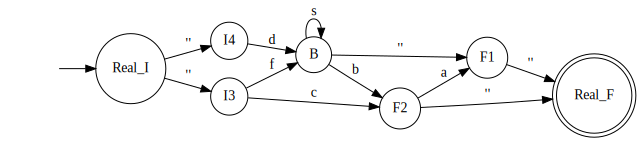

In [100]:
dotObj_gnfa(grnfa1)

## 3(b,c) i : Apply the elimination order by supplying the second argument 
['B', 'F2', 'F1', 'I3', 'I4']

as you learned in the help

In [101]:
(Gfinal, DO, Rev_RE1) = del_gnfa_states(grnfa1, ['B', 'F2', 'F1', 'I3', 'I4'])

**** Eliminating state B ****
**** Eliminating state F2 ****
**** Eliminating state F1 ****
**** Eliminating state I3 ****
**** Eliminating state I4 ****


In [102]:
Rev_RE1

'((((((((d ((s)* b)) a) + (d (s)*)) + (d (s)*)) + (d ((s)* b))) + (d ((s)* b))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c))) + ((((((((f ((s)* b)) + c) + c) a) + (f (s)*)) + (f (s)*)) + (((f ((s)* b)) + c) + c)) + (((f ((s)* b)) + c) + c)))'

Generating LALR tables


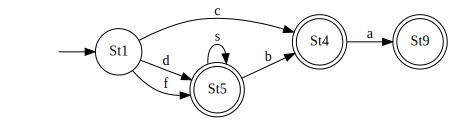

In [103]:
dotObj_dfa(min_dfa(nfa2dfa(re2nfa(Rev_RE1))))

## 3(b,c) ii : Apply the elimination order by supplying the second argument 
 ['I3', 'I4', 'F1', 'B', 'F2' ]

as you learned in the help

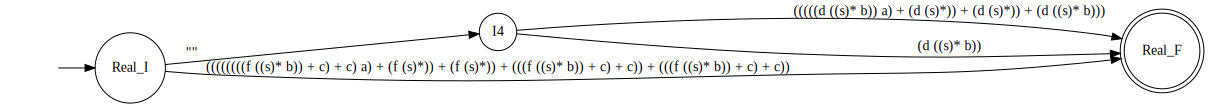

In [104]:
DO[4]

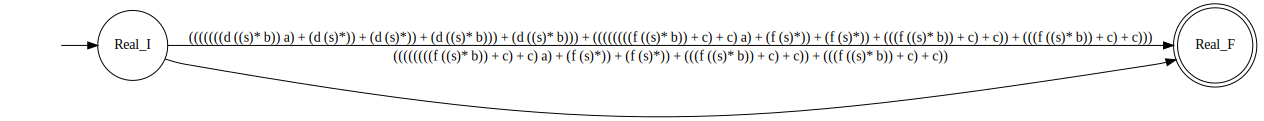

In [105]:
DO[5]

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

DO[0] is the initial GNFA machine, DO[1] is the next one, and so on. You will see each step getting
rid of one state.

### [[ ...UPDATED WORDING...]] Summarize your observation of the state elimination and which REs were introduced as a result. Pick TWO cases, one of which involves the removal of a state with a self-loop. Use one bullet per question case discussed.

* The length of DO is the number of states in the GNFA not includeing Real_I and Real_F plus one for the original GNFA.

* The removal step for $F1$ results in a RE which since it leads to an accepting state, only considers the incoming symbols, so it produces the union of the incoming edges $\epsilon + a$.

* The removal step for $B$ results in a RE which is the concationation of the union of all the incoming edges $(d+f) + f$ with the self loop $s^*$ and the union of all the outgoing edges $b$. Finally this RE can be combined with the $c$ edge going from $Real_I$ to $F2$ to make $((d + f) + f)s^*b + c$.

In [106]:
(Gfinal, DO, Rev_RE2) = del_gnfa_states(grnfa1, ['I3', 'I4', 'F1', 'B', 'F2' ])

**** Eliminating state I3 ****
**** Eliminating state I4 ****
**** Eliminating state F1 ****
**** Eliminating state B ****
**** Eliminating state F2 ****


In [107]:
Rev_RE2

'((((((((d + f) + f) ((s)* b)) + c) + c) ((a + "") + "")) + (((d + f) + f) (s)*)) + (((d + f) + f) (s)*))'

## Examine DO[0] through DO[Last_Legal_Item] (find out how long DO is)

### [[ Slightly Updated Wording ]] Summarize your observation of the state elimination and which REs were introduced as a result (using the same guidelines as with Rev_RE1 above.

*

*

*

*

*

*

*

## 3(d)i Check for isomorphism as requested between Rev_RE1 and Rev_RE2

Apply a Jove call that is compact (and is in my lecture slides) that checks that Rev_RE1 and Rev_RE2 
are equivalent. It has to involve iso_dfa and min_dfa and other calls.

In [108]:
iso_dfa( min_dfa(nfa2dfa(re2nfa(Rev_RE1))), min_dfa(nfa2dfa(re2nfa(Rev_RE2))) )

Generating LALR tables
Generating LALR tables


True

In [109]:
# Just look at it again for comparison

Rev_RE1_hand

"c + ca + (f+d)s*('' + b + ba)"

## 3(d)i Check for isomorphism as requested between Rev_RE1 and Rev_RE1_hand

Same methods as above.

In [110]:
iso_dfa( min_dfa(nfa2dfa(re2nfa(Rev_RE1))), min_dfa(nfa2dfa(re2nfa(Rev_RE1_hand))) )

Generating LALR tables
Generating LALR tables


True

# Chasing down the RE2NFA components (SV)

Find out where the s* components are and explain the set of all strings that precede s* in Rev_RE2 and the NFA of Rev_RE2

Find out where the ending "a" is, and find out the set of all the symbols that precede a

Let's first look at the NFA and then see where the RE "parts" are in it.

Generating LALR tables


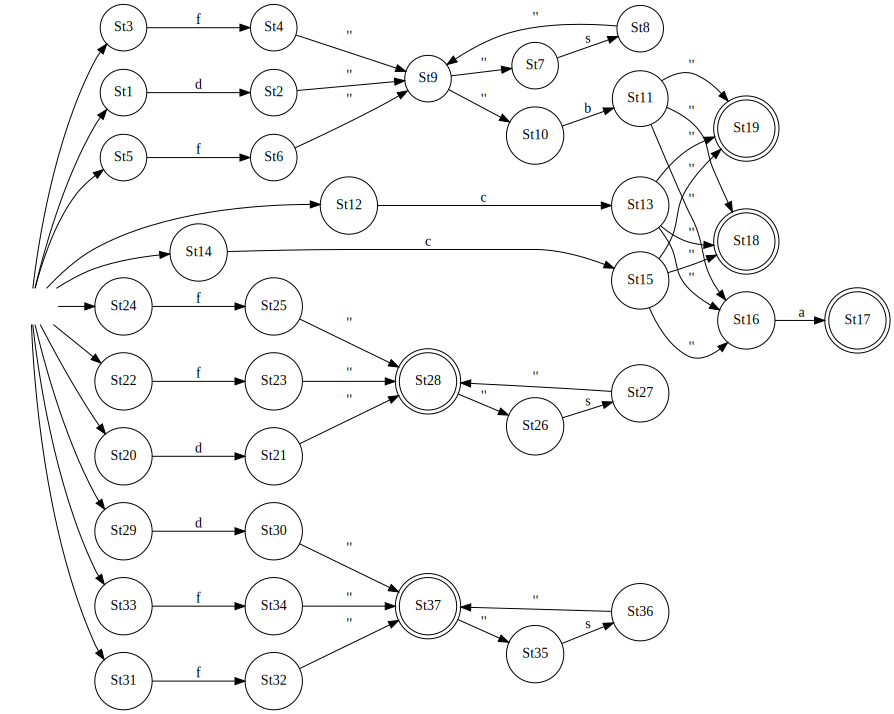

In [111]:
dotObj_nfa(re2nfa(Rev_RE2))

## Chasing down the RE2NFA components (SV) - details


This is an exercise in explaning how Rev_RE2 got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - St37 is a case where Star is being used.
  - The construction is for the $s^*$ part of the RE and is made up of a loop between St37, St36 and St35
  - The construction is equivalent to a self loop on just St37 for the symbol $s$
  - Starting at St37 zero or more $s$ symbols will result in an accepting string

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain.
  - In the transitions between St25, St23, St21 and St28, there is a concatination between $(d + f) + f$ and $s^*$.
  - This is done by adding epsilon transitions between the final states of the construct for $(d+f) + f$ and the intial states of the $s^*$ construct.
  - The final states of the $(d+f) + f$ construct become nonfinal.
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). Explain how the concatenation is accomplished.
  - In the transitions between St9 and St10 there is a concatination between $s^*$ and $b$
   This is done by adding a epsilon transition between the final state of the construct for $s^*$ and the intial states of the $b$ construct.
  - The final states of the $s^*$ construct become nonfinal.

## Repeat finding out the aforesaid paths in your own Rev_RE1_hand

Generating LALR tables


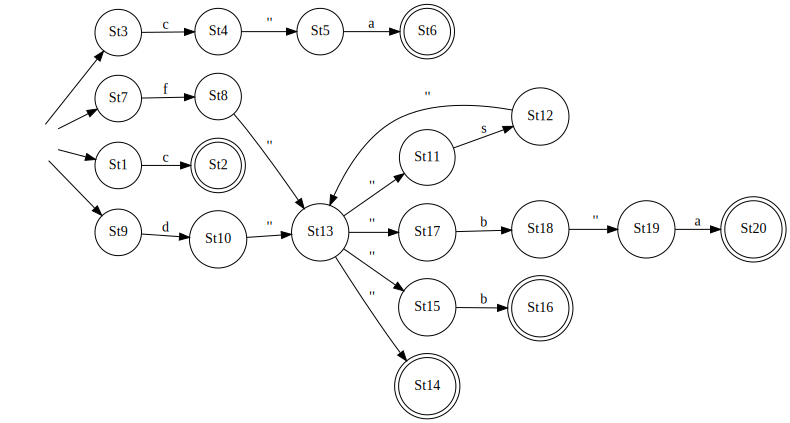

In [112]:
dotObj_nfa(re2nfa(Rev_RE1_hand))


This is an exercise in explaning how Rev_RE1_hand got translated to an NFA. You are to pick these cases and find an example of each, and explain below. What you pick does not matter.

* Find a case where a Star is used, and explain the construction, pointing to the states involved. Use up to 6 bullets below. More or less based on how you explain (clarity not length emphasized).
  - A star is used in the loop between St13, St12 and St11.
  - Starting from St13 zero or more $s$ symbols will result in a state of St13
  - The construct is equivelnt to a self loop on the symbol $s$ from St13 to St13
  - The epsilon transitions are an artifact of the re2nfa algorithm.

* Find a case where the Star follows something (I.e. a concatenation of the form "X" followed by "Star" is used). If such a case does not arise in your RE, skip this part. Show how that concatenation construction is accomplished in the same manner (up to 6 bullets roughly) as above. More or less based on how you explain. 
  - A star follows another construct in the transition between St10, St8 and St13.
  - The concatenation is between $d + f$ and $s^*$
  - The concatenation is accomplished by adding epsilon transitions from the final states of the $d + f$ construct to the intial states of the $s^*$ construct, and making the final states of the $d + f$ construct nonfinal.
  
* Find a case where something follows Star (I.e. a concatenation of the form "Star" followed by "X"). If such a case does not arise in your RE, skip this part. Explain how the concatenation is accomplished.
  - A construct following a star can be found in the transition between St13 and St14,St15 and St17.
  - The concatination is between $s^*$ and $ba + b + \epsilon$.
  - The construct is constructed by adding epsilon transitions from the final states of the $s^*$ construct and the intial states of the $ba + b + \epsilon$, and making the final states of the $s^*$ construct nonfinal.

# END
